# Pixel Art
Este código está utilizando a biblioteca Diffusers para gerar uma imagem de "pixel art arcade aircraft" usando Stable Diffusion, com algumas personalizações interessantes:

1. Carrega o modelo base Stable Diffusion XL. Este é um modelo pré-treinado mais capaz que o Stable Diffusion padrão.

2. Cria um pipeline com este modelo em FP16 e GPU para melhor performance.

3. Carrega pesos adicionais do modelo LoRA "pixel-art-xl", que é especializado em gerar pixel art.

4. Gera a imagem solicitada usando 100 steps de inferência para boa qualidade.

5. Ao mesclar o SD XL base com o LoRA pixel-art-xl, estamos obtendo o poder geral do SD com a especialização em pixel art do LoRA.

6. Isso permite gerar uma imagem de "pixel art arcade aircraft" com elementos visuais de pixel art ao mesmo tempo que respeita a descrição textual, os créditos vão para a flexibilidade e personalização permitidos pelo Diffusers!


In [ ]:
!pip install diffusers transformers safetensors accelerate

In [ ]:
import torch
from diffusers import DiffusionPipeline,StableDiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Pixel Art

In [ ]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors")
imagem = pipeline( "pixel art arcade aircraft", num_inference_steps=100).images[0]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

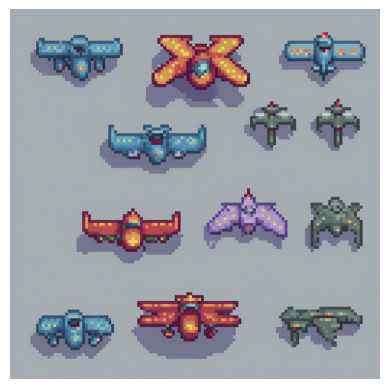

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Caricaturas

In [ ]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("Norod78/SDXL-Caricaturized-Lora", weight_name="SDXL-Caricaturized-Lora.safetensors")
imagem = pipeline( "Klaus Meine Caricaturized Very detailed, clean, high quality, sharp image.").images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

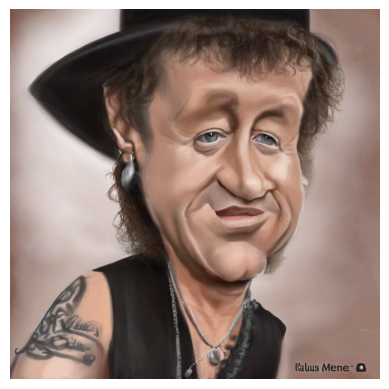

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Robôs

In [ ]:
prompt = "A realistic image of a Robot with a gun."
num_inference_steps=32
guidance_scale=5.0

In [ ]:
scheduler = EulerDiscreteScheduler.from_pretrained("nousr/robo-diffusion-2-base", subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained("nousr/robo-diffusion-2-base", scheduler=scheduler,
                                                   torch_dtype=torch.float16).to("cuda")
imagem = pipeline(prompt=prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]

unet/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

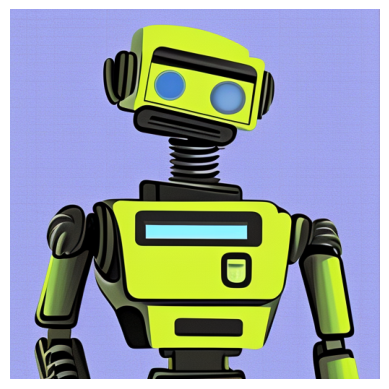

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()